# Midterm Project: Potability Water Detection

## Loading Database

In [1]:
#import pandas
import pandas as pd
#loading csv file
waters = pd.read_csv("water_potability.csv")

In [2]:
waters.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##

## Checking for Null Values

In [3]:
#Check how many Null Values in each Column
waters.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#Train Numerical Variables Missing Values
waters['ph'].fillna(waters['ph'].median(), inplace=True)
waters['Sulfate'].fillna(waters['Sulfate'].median(), inplace=True)
waters['Trihalomethanes'].fillna(waters['Trihalomethanes'].median(), inplace=True)

In [5]:
waters.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Identifying Features and Target Variables

In [6]:
#split dataset into features and target variables
feature_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = waters[feature_cols]  #features
y = waters.Potability     #target

## Splitting Data into Training and Testing Data

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training Logistic Regression Model

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=2001)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2001)

## Training SVM Model

In [9]:
#import svm model
from sklearn import svm

#create a svm Classifier
clf = svm.SVC(kernel='linear') #Linear Kernel

#Train the model using the trainings sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Training Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction with Log. Regression, SVM, and Decision Tree

In [11]:
#Predict the response for test datasets
y_pred_svm = clf.predict(X_test)

y_pred_log = logreg.predict(X_test)

y_pred_tree = classifier.predict(X_test)

# compute the accuracy
import numpy as np
accuracy_svm = np.sum(y_pred_svm == y_test) / len(y_test)

accuracy_log = np.sum(y_pred_log == y_test) / len(y_test)

accuracy_tree = np.sum(y_pred_tree == y_test) / len(y_test)

## Training Neural Network

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train.shape

(2620, 9)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim = 9, activation = 'relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000023FDA098310>>

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
164/164 [==============================] - 0s 515us/step - loss: 0.6879 - accuracy: 0.6107
Epoch 2/50
164/164 [==============================] - 0s 515us/step - loss: 0.6799 - accuracy: 0.6107
Epoch 3/50
164/164 [==============================] - 0s 515us/step - loss: 0.6751 - accuracy: 0.6107
Epoch 4/50
164/164 [==============================] - 0s 528us/step - loss: 0.6722 - accuracy: 0.6107
Epoch 5/50
164/164 [==============================] - 0s 522us/step - loss: 0.6706 - accuracy: 0.6107
Epoch 6/50
164/164 [==============================] - 0s 485us/step - loss: 0.6696 - accuracy: 0.6107
Epoch 7/50
164/164 [==============================] - 0s 528us/step - loss: 0.6691 - accuracy: 0.6107
Epoch 8/50
164/164 [==============================] - 0s 485us/step - loss: 0.6688 - accuracy: 0.6107
Epoch 9/50
164/164 [==============================] - 0s 503us/step - loss: 0.6687 - accuracy: 0.6107
Epoch 10/50
164/164 [==============================] - 0s 497us/step - loss: 0.668

## Prediction with Neural Network

In [19]:
model.predict(X_test)
model.evaluate(X_test, y_test)[1]
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred_neural = (model.predict(X_test) > 0.5).astype(int)

82/82 [==============================] - 0s 531us/step - loss: 0.6685 - accuracy: 0.6107


## Computation of Accuracy and Comparison

In [20]:
print('Test Accuracy of the SVM is:')
print(accuracy_svm)
print('Test Accuracy of the Logistic Model is:')
print(accuracy_log)
print('Test Accuracy of the Decision Tree Model is')
print(accuracy_tree)
print('The difference (SVM - Logistic):')
print(accuracy_svm - accuracy_log)

Test Accuracy of the SVM is:
0.573170731707317
Test Accuracy of the Logistic Model is:
0.5685975609756098
Test Accuracy of the Decision Tree Model is
0.5487804878048781
The difference (SVM - Logistic):
0.004573170731707266


# Confusion Matrices

## Logistic Regression

In [21]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix_log

array([[398,   0],
       [258,   0]], dtype=int64)

## SVM Model

In [22]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm

array([[396,   2],
       [255,   3]], dtype=int64)

## Decision Tree

In [23]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)
cnf_matrix_tree

array([[241, 157],
       [152, 106]], dtype=int64)

## Neural Network

In [24]:
y_pred_neural.size

656

In [25]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_neural = metrics.confusion_matrix(y_test, y_pred_neural)
cnf_matrix_neural

array([[398,   0],
       [258,   0]], dtype=int64)

## Visualizing Confusion Matrix using HeatMap

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Logistic Regression

Text(0.5, 257.44, 'Predicted label')

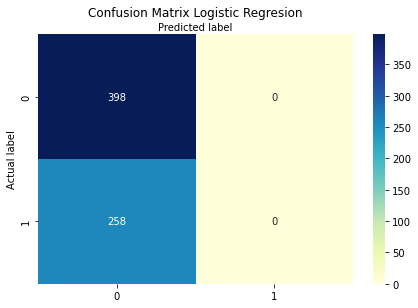

In [27]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_log, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regresion')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

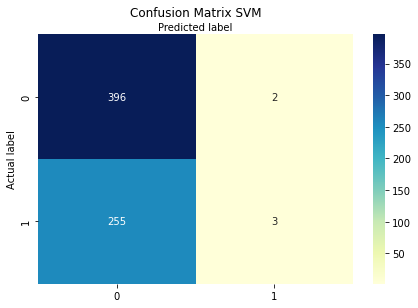

In [28]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_svm, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

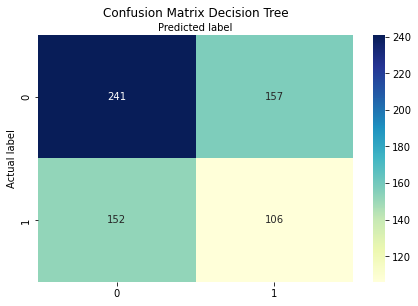

In [29]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_tree, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Neural Network

Text(0.5, 257.44, 'Predicted label')

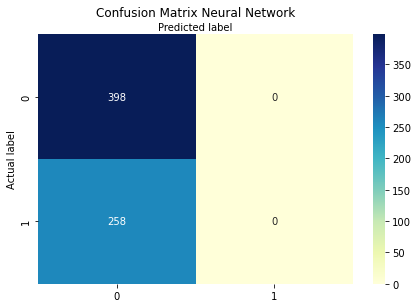

In [30]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_neural, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Neural Network')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')